# Preliminary Data exploration

Dataset met alle metadata en preprocessing steps binnenhalen.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../Materials/KVO_META.csv", encoding='Latin-1', index_col=False)
df['Genre'] = df['genre'].str.lower()


In [6]:
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [7]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

## Gala / Volksvertoningen

In [8]:
#Gefilterede df's waarin enkel de volksvertoningen en galavoorstellingen in beschouwing worden genomen
volk = df[df['Occasion'].astype(str).str.contains("Volk")]
galas = df[df['Occasion'].str.contains('Gala') | (df['Occasion'] == 'Gala')]


In [22]:
counts1 = volk['Season'].value_counts().sort_index(axis=0)
counts2 = galas['Season'].value_counts().sort_index(axis=0)

counts2

1893-1894     1
1894-1895     1
1895-1896     6
1896-1897     3
1903-1904     1
1904-1905     4
1906-1907     3
1907-1908    13
1908-1909     9
1909-1910     2
1913-1914     1
1919-1920     1
1922-1923     1
1923-1924     7
1924-1925     2
1925-1926     5
1927-1928     4
1929-1930     2
1931-1932     8
1932-1933     3
1933-1934     1
2099-2100     2
Name: Season, dtype: int64

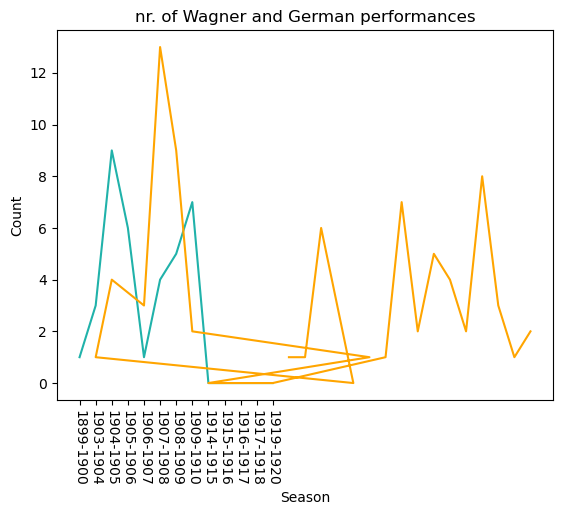

In [20]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots()

counts1 = volk['Season'].value_counts().sort_index(axis=0)
counts2 = galas['Season'].value_counts().sort_index(axis=0)

# Adding a row for the missing season with a value of zero
counts2.loc['1914-1915'] = 0
counts2.loc['1915-1916'] = 0
counts2.loc['1916-1917'] = 0
counts2.loc['1917-1918'] = 0
counts2.loc['1919-1920'] = 0
counts2.loc['1897-1898'] = 0
counts2.loc['1898-1899'] = 0
counts2.loc['1899-1900'] = 0
counts2.loc['1900-1901'] = 0
counts2.loc['1901-1902'] = 0
counts2.loc['1902-1903'] = 0
counts2.loc['1905-1906'] = 0


counts2 = counts2.sort_index()


# Sorting the index to ensure correct order of data points in the line plot
counts1.loc['1914-1915'] = 0
counts1.loc['1915-1916'] = 0
counts1.loc['1916-1917'] = 0
counts1.loc['1917-1918'] = 0
counts1.loc['1919-1920'] = 0

counts1 = counts1.sort_index()

# Generate x and y data for the line plot
x = counts1.index
y = counts1.values

# Plotting the line chart
ax.plot(x, y, color='lightseagreen', label='German')
ax.plot(x2, y2, color = 'orange', label = 'Wagner')

# Adding ticks and labels to the x-axis
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

# Adding labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('nr. of Wagner and German performances')

plt.show()

In [18]:
x2

Index(['1893-1894', '1894-1895', '1895-1896', '1896-1897', '1903-1904',
       '1904-1905', '1906-1907', '1907-1908', '1908-1909', '1909-1910',
       '1913-1914', '1914-1915', '1915-1916', '1916-1917', '1917-1918',
       '1919-1920', '1922-1923', '1923-1924', '1924-1925', '1925-1926',
       '1927-1928', '1929-1930', '1931-1932', '1932-1933', '1933-1934',
       '2099-2100'],
      dtype='object')

### Absolute frequenties

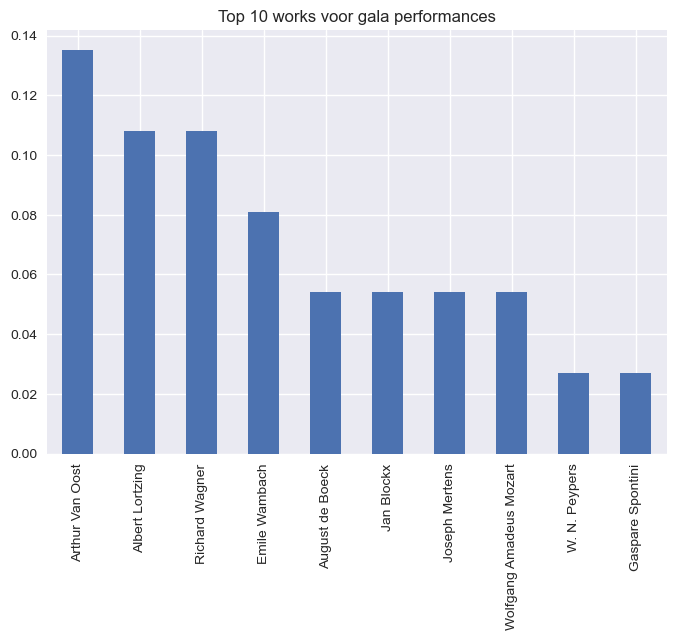

In [8]:
volk['Composer'].value_counts(normalize = True).head(10).plot(kind='bar', title="Top 10 works voor gala performances");  

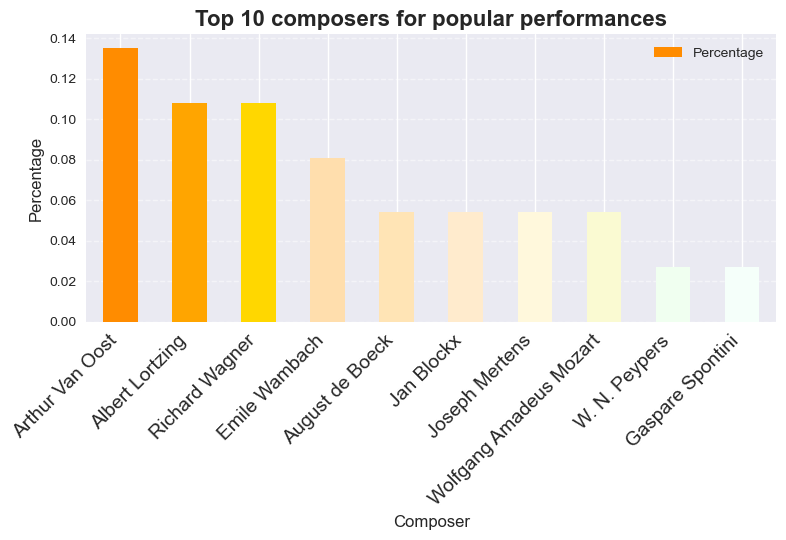

In [9]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn')

# Define custom colors for the bars
colors = ['#FF8C00', '#FFA500', '#FFD700', '#FFDEAD', '#FFE4B5', '#FFEBCD', '#FFF8DC', '#FAFAD2', '#F0FFF0', '#F5FFFA']

# Create a bar plot
volk['Composer'].value_counts(normalize=True).head(10).plot(kind='bar', color=colors)

# Set the title and labels
plt.title("Top 10 composers for popular performances", fontsize=16, fontweight='bold')
plt.xlabel("Composer", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

# Customize the tick labels and rotation
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add a legend
plt.legend(["Percentage"], loc='upper right')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


## Relatieve frequenties

In [ ]:
volk_nowag = volk[volk['Composer'] != 'Richard Wagner']
gala_nowag = galas[galas['Composer'] != 'Richard Wagner']

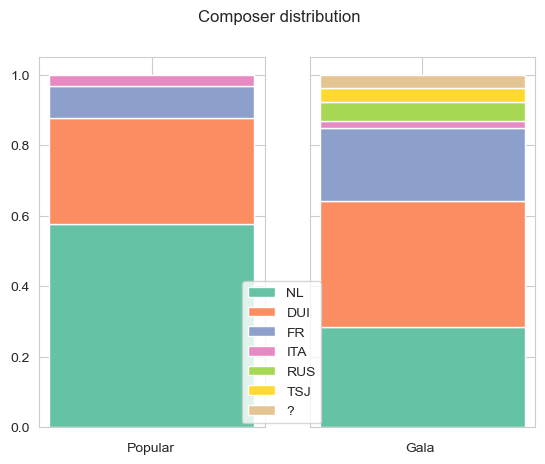

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the first stacked bar chart
data_1 = dict(volk_nowag['Original language'].value_counts().head(9))
# Define the data for the second stacked bar chart
data_2 = dict(gala_nowag['Original language'].value_counts().head(9))

# Define a list of colors for the bars
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6', '#b3e6ff', '#e6ccb3', '#c2f0c2']

# Create a list of keys in the order they appear in the data dictionaries
keys = []
for key in data_1.keys():
    if key not in keys:
        keys.append(key)
for key in data_2.keys():
    if key not in keys:
        keys.append(key)

# Create the figure and axis objects
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

# Stack the data for the first chart
stacked_data_1 = np.row_stack([data_1.get(key, 0) for key in keys])
stacked_data_1 = stacked_data_1 / stacked_data_1.sum(axis=0)

# Define the x-axis labels for the first chart
x_labels_1 = ['']

# Create the stacked bar chart for the first chart
for i, key in enumerate(keys):
    if key in data_1.keys():
        #color = colors[i]
        ax1.bar(x_labels_1, stacked_data_1[i], bottom=stacked_data_1[:i].sum(axis=0))

# Add a legend for the first chart
#ax1.legend([key for key in keys if key in data_1.keys()])

# Define the x-axis labels for the second chart
x_labels_2 = ['']

# Stack the data for the second chart
stacked_data_2 = np.row_stack([data_2.get(key, 0) for key in keys])
stacked_data_2 = stacked_data_2 / stacked_data_2.sum(axis=0)

# Create the stacked bar chart for the second chart
for i, key in enumerate(keys):
    if key in data_2.keys():
        #color = colors[i]
        ax2.bar(x_labels_2, stacked_data_2[i], bottom=stacked_data_2[:i].sum(axis=0))

# Add a legend for the second chart
ax2.legend([key for key in keys if key in data_2.keys()], loc = (-0.3, 0.01))

# Add axis labels and title
fig.text(0.3, 0.06, 'Popular', ha='center')
fig.text(0.72, 0.06, 'Gala', ha='center')
#fig.text(0.08, 0.5, 'Percentages', va='center', rotation='vertical')
fig.suptitle('Composer distribution')

# Display the chart
plt.show()
